In [6]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

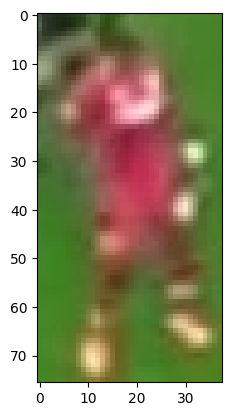

In [3]:
plt.imshow(image)
plt.show()

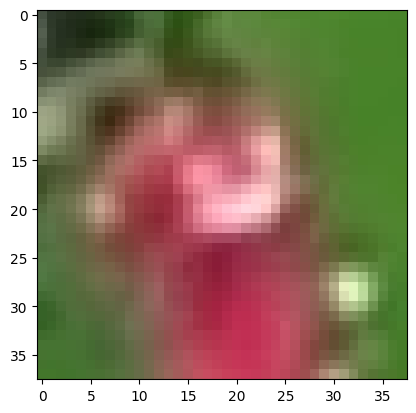

In [4]:
# take the top half of the image

top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image in two Clusters

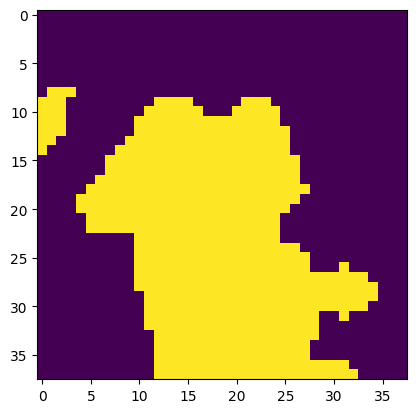

In [14]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels 
labels = kmeans.labels_

# Reshape the labels into original shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()


In [15]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_cluster)

0


In [16]:
player_cluster = 1 - non_player_cluster

print(player_cluster)

1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([173.15097691,  96.23445826,  99.84369449])